In [266]:
import pandas as pd
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])
Nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2010-04-01 to 2018-03-28
Data columns (total 6 columns):
Open                 1987 non-null float64
High                 1987 non-null float64
Low                  1987 non-null float64
Close                1987 non-null float64
Shares Traded        1987 non-null int64
Turnover (Rs. Cr)    1987 non-null float64
dtypes: float64(5), int64(1)
memory usage: 108.7 KB


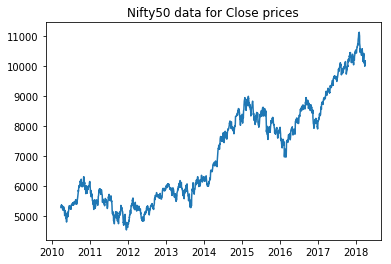

In [267]:
#plotting Close prices
import matplotlib.pyplot as plt
plt.plot(Nifty_data.Close)
plt.title('Nifty50 data for Close prices')
plt.show()

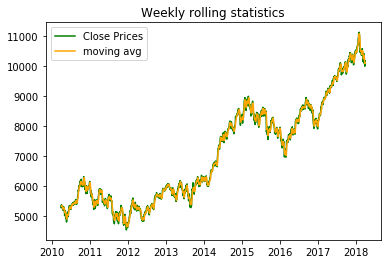

In [268]:
# moving average for window=5
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=5).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Weekly rolling statistics')
plt.show()

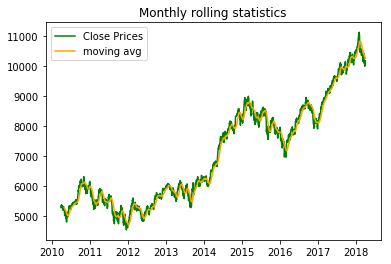

In [269]:
# moving average for window=21
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=21).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Monthly rolling statistics')
plt.show()

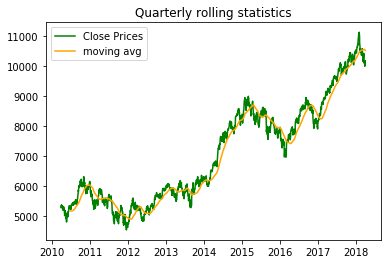

In [270]:
# Moving average for window=63
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=63).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Quarterly rolling statistics')
plt.show()

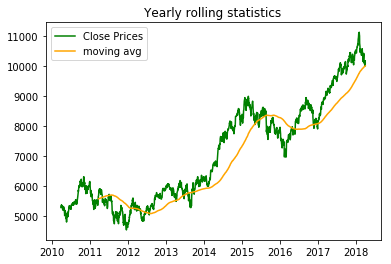

In [271]:
# moving average for window=252
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=252).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Yearly rolling statistics')
plt.show()

In [272]:
# applying dickey fuller test on Close prices
from statsmodels.tsa.stattools import adfuller
stnry_test=adfuller(Nifty_data['Close'],autolag='AIC')
stnry_rslt = pd.Series(stnry_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in stnry_test[4].items():
    stnry_rslt['Critical Value (%s)'%key] = value
print(stnry_rslt)
if(stnry_test[1]>0.05):
    print("Time Series is not stationary")
else:
    print("Time series is stationary")

Test Statistic                   -0.371803
p-value                           0.914701
#Lags Used                        1.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64
Time Series is not stationary


In [273]:
# perform differencing
diff=Nifty_data['Close']-Nifty_data['Close'].shift(1)

In [274]:
diff.dropna(inplace=True)

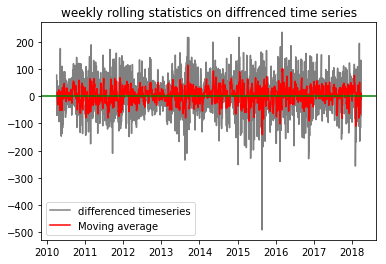

In [275]:
# plotting moving average of differenced series with window=5
plt.plot(diff,label='differenced timeseries',color='grey')
plt.plot(diff.rolling(window=5).mean(),label='Moving average',color='red')
plt.title('weekly rolling statistics on diffrenced time series')
plt.axhline(y=0,color='green')
plt.legend()
plt.show()

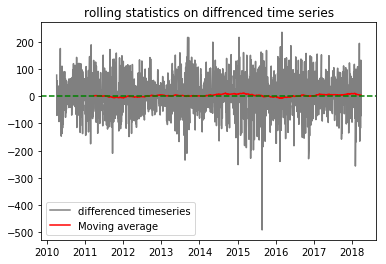

In [276]:
# plotting moving average of differenced series with window=252
plt.plot(diff,label='differenced timeseries',color='grey')
plt.plot(diff.rolling(window=252).mean(),label='Moving average',color='red')
plt.title('rolling statistics on diffrenced time series')
plt.axhline(y=0,linestyle='--',color='g')
plt.legend()
plt.show()

In [277]:
# applying Dickey fuller test on differenced series
from statsmodels.tsa.stattools import adfuller
stnry_test_diff=adfuller(diff,autolag='AIC')
stnry_rslt_diff = pd.Series(stnry_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in stnry_test[4].items():
    stnry_rslt_diff['Critical Value (%s)'%key] = value
print(stnry_rslt_diff)
if(stnry_test_diff[1]>0.05):
    print("Time Series is not stationary")
else:
    print("Time series is stationary")

Test Statistic                  -41.047846
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64
Time series is stationary


In [278]:
# seperating train and test data
train=Nifty_data['Close'].iloc[:1750]
test=Nifty_data['Close'].iloc[1750:]

In [279]:
train.index

DatetimeIndex(['2010-04-01', '2010-04-05', '2010-04-06', '2010-04-07',
               '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13',
               '2010-04-15', '2010-04-16',
               ...
               '2017-03-31', '2017-04-03', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-17'],
              dtype='datetime64[ns]', name='Date', length=1750, freq=None)

# linear regression

In [280]:
# fitting linear regression
import numpy as np
from sklearn import linear_model
lm=linear_model.LinearRegression(normalize=True, fit_intercept=True)
lm.fit(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [281]:
print('Trend model coefficient={} and intercept={}'.format(lm.coef_[0],lm.intercept_))

Trend model coefficient=2.3548724960889773 and intercept=4618.380202170189


In [282]:
#calculating score of linear model on train data
lm.score(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

0.7783615453922795

In [283]:
# predicting values using trend model
predicts=lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))

In [284]:
#calculating score of linear model on test data
lm.score(np.arange(np.array(len(predicts[1750:]))).reshape((-1,1)), test)

-142.50448257708487

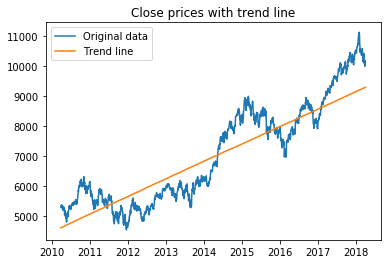

In [285]:
# plotting trend line with Close prices
plt.plot(Nifty_data['Close'],label='Original data')
plt.plot(pd.Series(lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1))),index=Nifty_data.index),label='Trend line')
plt.title('Close prices with trend line')
plt.legend()
plt.show()

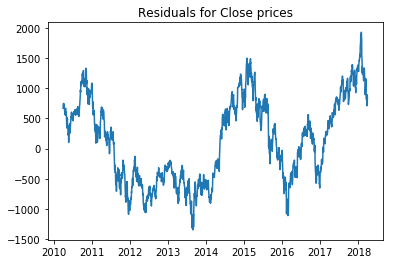

In [286]:
# calculating and plotting Residuals
Residuals=Nifty_data['Close']-lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))
plt.plot(pd.Series(Residuals,index=Nifty_data.index),label=Residuals)
plt.title('Residuals for Close prices')
plt.show()

# Ridge regression

In [287]:
# fitting ridge regression
rr1=linear_model.Ridge(alpha=0.5,normalize=True)
rr1.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [288]:
# predicting values for ridge regression
rrpredicts=rr1.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))

In [289]:
rrpredicts

array([5304.82553478, 5306.39544978, 5307.96536477, ..., 8419.53688961,
       8421.1068046 , 8422.6767196 ])

In [290]:
# calculating score of ridge regression model on test data (alpha=0.5)
rr1.score(np.arange(np.array(len(rrpredicts[1750:]))).reshape((-1,1)), test)

-111.64933633990354

In [291]:
# calculating score of ridge regression model on test data
rr1.score(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

0.6918769292375817

##### generalized Cross-Validation

In [292]:
# fitting ridge regression with different values of alpha
rr2=linear_model.RidgeCV(alphas=[0.1,0.5, 1.0, 10.0],normalize=True)
rr2.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)

RidgeCV(alphas=[0.1, 0.5, 1.0, 10.0], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [293]:
# predicting values 
rr2predicts=rr2.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))

In [294]:
rr2predicts

array([4805.59256561, 4807.73335879, 4809.87415197, ..., 9052.92623128,
       9055.06702446, 9057.20781764])

In [295]:
# calculating score on train data
rr2.score(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

0.7719288053477157

In [296]:
# calculating score on test data
rr2.score(np.arange(np.array(len(rr2predicts[1750:]))).reshape((-1,1)), test)

-133.7114443598194

# lasso regression

In [297]:
#fitting lasso regression with alpha=0.1
lr=linear_model.Lasso(alpha=0.1,normalize=True)
lr.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [298]:
# predicting values using lasso regression model
lrpredicts=lr.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))

In [299]:
lrpredicts

array([4625.62175133, 4627.96834304, 4630.31493475, ..., 9281.25970005,
       9283.60629176, 9285.95288347])

In [300]:
# calculating scores train data
lr.score(np.arange(np.array(len(lrpredicts[:1750]))).reshape((-1,1)), train)

0.7783519206321188

In [301]:
# calculating score on test data
lr.score(np.arange(np.array(len(lrpredicts[1750:]))).reshape((-1,1)), test)

-142.15908873121373

In [302]:
# applying lasso regression and calculating score on test data with alpha=0.5 
lr2=linear_model.Lasso(alpha=0.5,normalize=True)
lr2.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)
lr2predicts=lr2.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))
lr2.score(np.arange(np.array(len(lr2predicts[1750:]))).reshape((-1,1)), test)

-140.78175509768852

# lars lasso

In [303]:
# applying lars lasso regression and calculating score on test data with alpha=0.5 
ll=linear_model.LassoLars(alpha=0.5,normalize=True)
ll.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)
llpredicts=ll.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))
ll.score(np.arange(np.array(len(llpredicts[1750:]))).reshape((-1,1)), test)

-140.78175509768855

In [304]:
# calculating score on train data
ll.score(np.arange(np.array(len(llpredicts[:1750]))).reshape((-1,1)), train)

0.7781209263882605

# baysien Regression

In [305]:
# applying baysien regression and calculating score on test data
br = linear_model.BayesianRidge(normalize=True)
br.fit(np.arange(np.array(len(train))).reshape((-1,1)), train)
brpredicts=br.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))
br.score(np.arange(np.array(len(brpredicts[1750:]))).reshape((-1,1)), test)

-142.48848186249393

In [306]:
# calculating score on train data
br.score(np.arange(np.array(len(brpredicts[:1750]))).reshape((-1,1)), train)

0.7783615247607715

 # statsmodels

In [307]:
from statsmodels.tsa import seasonal
decompose = seasonal.seasonal_decompose(Nifty_data['Close'],freq=252)

In [308]:
decompose.trend.dropna(inplace=True)
decompose.resid.dropna(inplace=True)

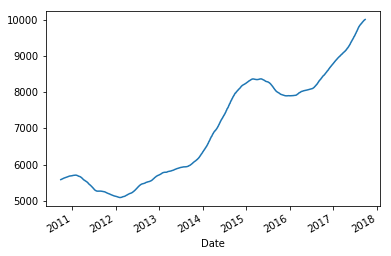

In [309]:
decompose.trend.plot()
plt.show()

# Run sequence plots

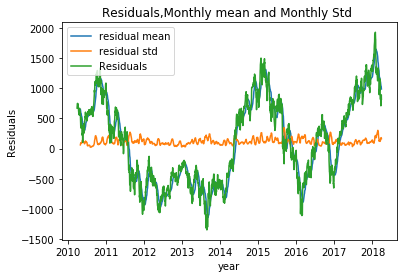

In [310]:
# plotting Residuals, rolling statistics (Residuals mean and Residuals std.) with window=21
plt.plot(Residuals.rolling(window=21).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=21).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Monthly mean and Monthly Std ')
plt.legend()
plt.show()

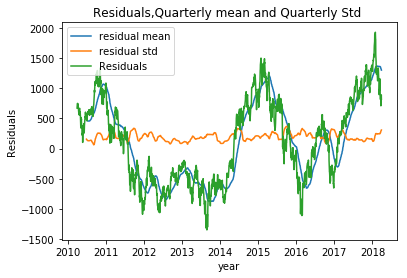

In [311]:
# plotting Residuals, rolling statistics (Residuals mean and Residuals std.) with window=63
plt.plot(Residuals.rolling(window=63).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=63).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Quarterly mean and Quarterly Std ')
plt.legend()
plt.show()

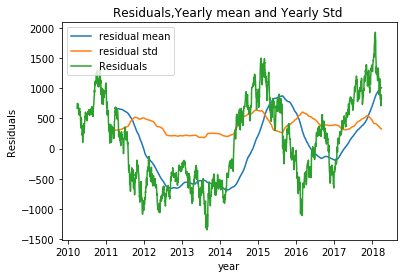

In [312]:
# plotting Residuals, rolling statistics (Residuals mean and Residuals std.) with window=252
plt.plot(Residuals.rolling(window=252).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=252).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Yearly mean and Yearly Std ')
plt.legend()
plt.show()

In [313]:
# adding Residuals to Nifty_data
Nifty_data['Residuals']=Residuals
# adding new column "month"
Nifty_data['month']=Nifty_data.index.map(lambda x:x.month)
# adding new column "year"
Nifty_data['year']=Nifty_data.index.map(lambda x:x.year)

In [314]:
# adding new column "quarter"
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
Nifty_data['quarter'] = Nifty_data['month'].map(lambda m: month_quarter_map.get(m))

In [315]:
# Creating new subseries
sub_series_quarterly = Nifty_data.groupby(by=['year', 'quarter'])['Residuals'].aggregate([np.mean, np.std])
sub_series_quarterly.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [316]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
sub_series_quarterly.reset_index(inplace=True)
sub_series_quarterly.index = sub_series_quarterly['year'].astype(str) + '-' + sub_series_quarterly['quarter']
sub_series_quarterly.head()

,year,quarter,Quarterly Mean,Quarterly Standard Deviation
2010-Q2,2010,Q2,485.421131,157.670891
2010-Q3,2010,Q3,696.596141,193.226523
2010-Q4,2010,Q4,1045.849666,155.593209
2011-Q1,2011,Q1,430.527603,234.236798
2011-Q2,2011,Q2,297.627121,219.394727


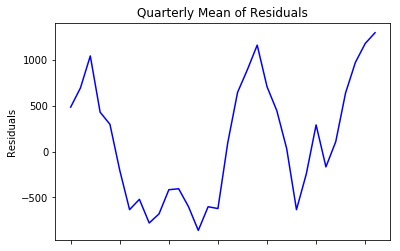

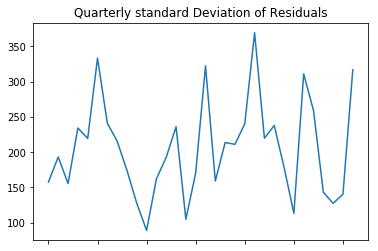

In [317]:
# plotting quarterly mean and quarterly std.
sub_series_quarterly['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.ylabel('Residuals')
plt.show()
sub_series_quarterly['Quarterly Standard Deviation'].plot()
plt.title('Quarterly standard Deviation of Residuals')
plt.show()

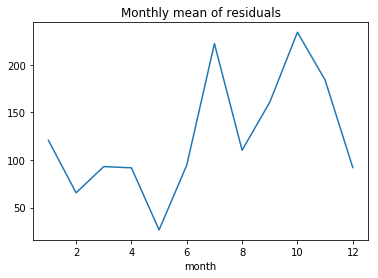

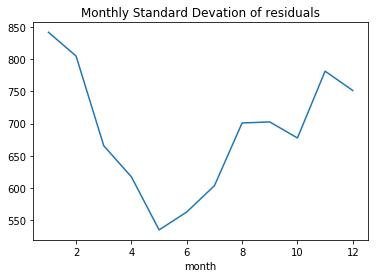

In [318]:
# Creating new subseries
sub_series_Monthly = Nifty_data.groupby(by=['month'])['Residuals'].aggregate([np.mean, np.std])
sub_series_Monthly.columns = ['monthly Mean', 'monthly Standard Deviation']
# plotting sub series
sub_series_Monthly['monthly Mean'].plot()
plt.title('Monthly mean of residuals')
plt.show()
sub_series_Monthly['monthly Standard Deviation'].plot()
plt.title('Monthly Standard Devation of residuals')
plt.show()

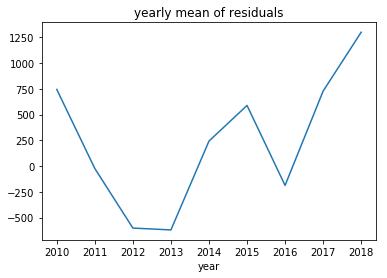

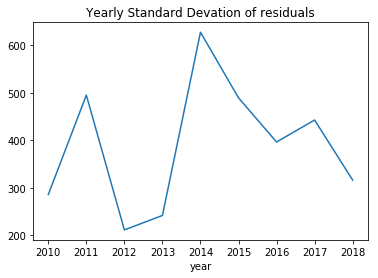

In [319]:
# Creating new subseries
sub_series_yearly = Nifty_data.groupby(by=['year'])['Residuals'].aggregate([np.mean, np.std])
sub_series_yearly.columns = ['yearly Mean', 'yearly Standard Deviation']
# plotting sub series
sub_series_yearly['yearly Mean'].plot()
plt.title('yearly mean of residuals')
plt.show()
sub_series_yearly['yearly Standard Deviation'].plot()
plt.title('Yearly Standard Devation of residuals')
plt.show()

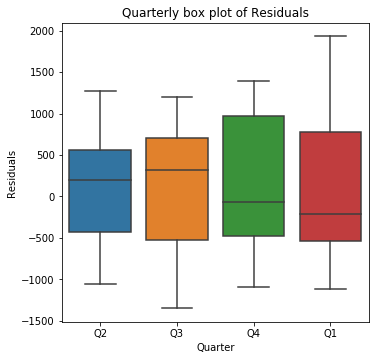

In [320]:
# Multiple Boxplot(Quarterly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','quarter']], y=Nifty_data['Residuals'], x=Nifty_data['quarter'])
g.set_title('Quarterly box plot of Residuals')
g.set_xlabel('Quarter')
g.set_ylabel('Residuals')
plt.show()

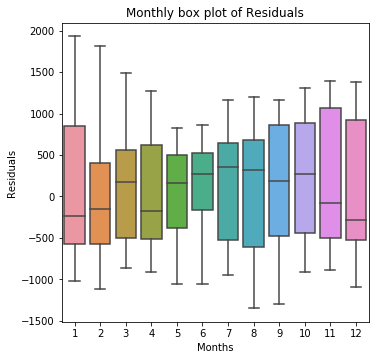

In [321]:
# Multiple Boxplot(Monthly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','month']], y=Nifty_data['Residuals'], x=Nifty_data['month'])
g.set_title('Monthly box plot of Residuals')
g.set_xlabel('Months')
g.set_ylabel('Residuals')
plt.show()

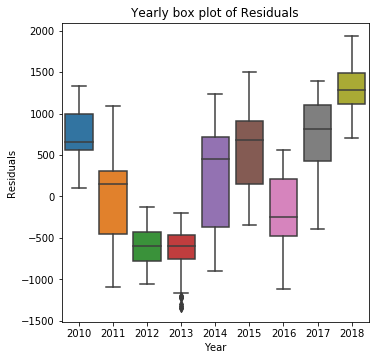

In [322]:
# Multiple Boxplot(Yearly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','year']], y=Nifty_data['Residuals'], x=Nifty_data['year'])
g.set_title('Yearly box plot of Residuals')
g.set_xlabel('Year')
g.set_ylabel('Residuals')
plt.show()